In [2]:
import pandas as pd
from squat_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average squat and heaviest squat by weight class and sex
# Then calcualte the relative strength and absolute & relative strength percent growth figures
sex_strength_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_squat_lbs=("squat_lbs", "mean"), 
            heaviest_squat=("squat_lbs", "max")
        )
        .assign(
            strength_ratio=lambda x: (x["avg_squat_lbs"] / x["avg_bodyweight_lbs"]), 
            absolute_strength_growth=lambda x: x.groupby("sex")["heaviest_squat"].pct_change().mul(100), 
            relative_strength_growth=lambda x: x.groupby("sex")["strength_ratio"].pct_change().mul(100)
        )
        .round(2)
)

sex_strength_comparisons

avg_bodyweight_lbs  avg_squat_lbs  heaviest_squat  \
weightclass_lbs    sex                                                      
148                F                146.91         449.12          500.45   
                   M                145.41         562.32          661.39   
165                F                161.79         470.84          622.81   
                   M                168.78         623.31          716.50   
181                F                177.53         475.34          589.74   
                   M                183.88         683.75          778.23   
198                F                194.26         483.48          617.29   
                   M                207.51         737.08          805.79   
220                F                213.04         476.43          551.16   
                   M                222.01         770.46          854.29   
242                M                238.06         794.16          870.82   
275                M                268.60         836.67          931.45   
308                M                298.58         849.40          970.03   
Super Heavy Weight F                289.51         572.27          701.07   
                   M                363.97         893.69         1025.15   

                        strength_ratio  absolute_strength_growth  \
weightclass_lbs    sex                                             
148                F              3.06                       NaN   
                   M              3.87                       NaN   
165                F              2.91                     24.45   
                   M              3.69                      8.33   
181                F              2.68                     -5.31   
                   M              3.72                      8.62   
198                F              2.49                      4.67   
                   M              3.55                      3.54   
220                F              2.24                    -10.71   
                   M              3.47                      6.02   
242                M              3.34                      1.93   
275                M              3.11                      6.96   
308                M              2.84                      4.14   
Super Heavy Weight F              1.98                     27.20   
                   M              2.46                      5.68   

                        relative_strength_growth  
weightclass_lbs    sex                            
148                F                         NaN  
                   M                         NaN  
165                F                       -4.81  
                   M                       -4.50  
181                F                       -7.99  
                   M                        0.69  
198                F                       -7.05  
                   M                       -4.47  
220                F                      -10.14  
                   M                       -2.30  
242                M                       -3.88  
275                M                       -6.62  
308                M                       -8.67  
Super Heavy Weight F                      -11.61  
                   M                      -13.69

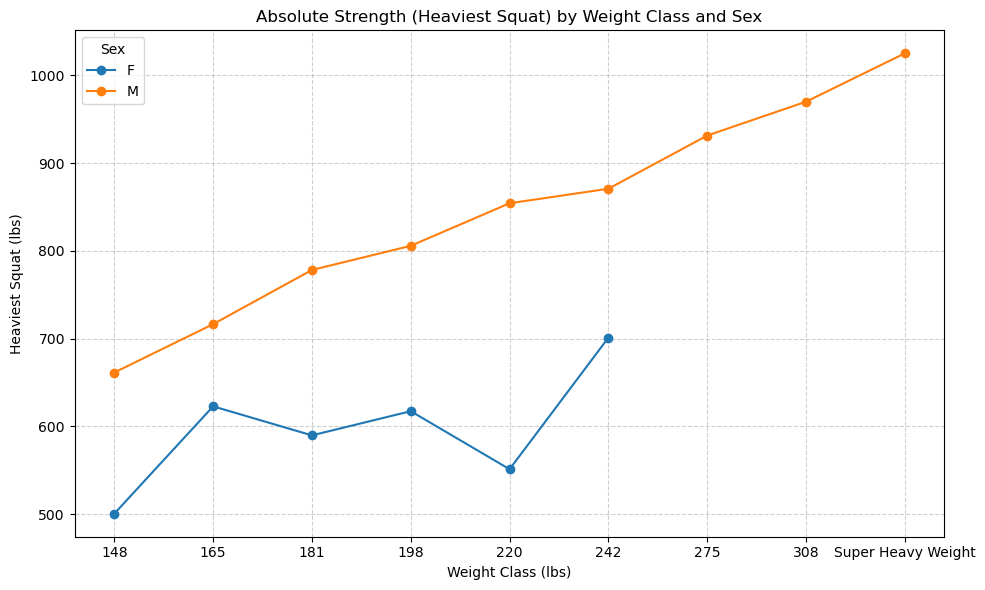

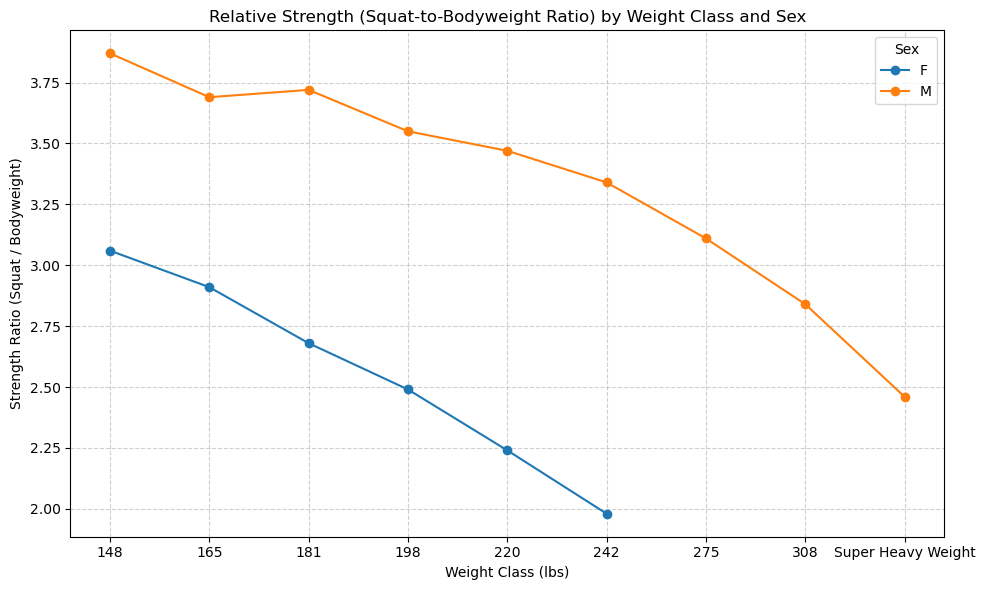

In [4]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_strength_comparisons.reset_index()

# Helper: ensure proper numeric order of weight classes
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999  # send 'Super Heavy Weight' to the end
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort dataframe by numeric weight class order
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Reusable plotting function
def plot_strength_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        data = data.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Absolute Strength (Heaviest Squat)
plot_strength_metric(
    y_col="heaviest_squat",
    title="Absolute Strength (Heaviest Squat) by Weight Class and Sex",
    ylabel="Heaviest Squat (lbs)"
)

# Relative Strength (Strength Ratio)
plot_strength_metric(
    y_col="strength_ratio",
    title="Relative Strength (Squat-to-Bodyweight Ratio) by Weight Class and Sex",
    ylabel="Strength Ratio (Squat / Bodyweight)"
)